# Overview of the COVID-related Tweets in different languages

A general overview of 6 datasets with hashtags "#covid-19" and "#coronavirus" in 6 languages (de, ru, uk, pl, it, en). The acquisition date is 2020-04-18 -- 2020-04-19. 

### Load packages:

In [1]:
using TextAnalysis
using JSON, OAuth, Twitter
using Colors
using ColorSchemes
using JLD
using Statistics
using XLSX
using CSV
using DataFrames
using Dates
using LinearAlgebra
using StatsBase
using MultivariateStats

┌ Info: Precompiling TextAnalysis [a2db99b7-8b79-58f8-94bf-bbc811eef33d]
└ @ Base loading.jl:1260
┌ Info: Precompiling Twitter [92393bbf-ba23-5323-a3fa-fbe1e5f35af8]
└ @ Base loading.jl:1260
┌ Info: Precompiling ColorSchemes [35d6a980-a343-548e-a6ea-1d62b119f2f4]
└ @ Base loading.jl:1260
┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1260
┌ Info: Precompiling StatsBase [2913bbd2-ae8a-5f71-8c99-4fb6c76f3a91]
└ @ Base loading.jl:1260
┌ Info: Precompiling MultivariateStats [6f286f6a-111f-5878-ab1e-185364afe411]
└ @ Base loading.jl:1260


### Plotting settings:

In [2]:
import Plots
import PyPlot
Plots.pyplot()

plt = PyPlot

SMALL_SIZE = 10
MEDIUM_SIZE = 11
BIGGER_SIZE = 12

plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

colors = vcat([0 0 0 0], plt.cm.YlOrRd(range(0, stop=1, length=10))[2:end,:]);

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260
┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1260


### Define some useful functions:

In [3]:
conv_to_hour(date) = dayofyear.(date).*24 .+ hour.(date)
conv_to_minumte(date) = dayofyear.(date).*24.0 .* 60.0 .+ hour.(date) .* 60.0 .+ minute.(date)
conv_to_seconds(date) = dayofyear.(date).*24.0 .* 60.0 .* 60.0 .+ hour.(date) .* 60.0 .* 60.0 .+ minute.(date) .* 60.0 .+ second.(date)
conv_to_hmin(date) = hour.(date) .* 60.0 .+ minute.(date) 

function linreg(x, y; bias_c=true)
    
	X = Array{Float64}(undef, length(x),1)
	Y = Vector{Float64}(undef, length(y))
	X[1:length(x),1] .= x
	Y[1:length(y)] .= y
	sol = llsq(X, Y)
	coeff, bias = sol[1], sol[2]
    
    if bias_c == true
        g1(x) = bias + coeff*x 
        return g1, (coeff, bias)
    end
    
    if bias_c == false
        g2(x) = coeff*x
        return g2, (coeff, bias)
    end
    
end

linreg (generic function with 1 method)

### Load data files:

In [4]:
new_df = XLSX.readxlsx("covid-de.xlsx")["Sheet1"]
stop_ind = new_df.dimension.stop;

data_tmp = new_df["A2:$stop_ind"];

df_1 = DataFrame(data_tmp,  [:retweet_count, :favorite_count, 
        :created_at, :text, :id_str, 
        :lang]);

In [5]:
new_df = XLSX.readxlsx("covid-it.xlsx")["Sheet1"]
stop_ind = new_df.dimension.stop;

data_tmp = new_df["A2:$stop_ind"];

df_2 = DataFrame(data_tmp,  [:retweet_count, :favorite_count, 
        :created_at, :text, :id_str, 
        :lang]);

In [6]:
new_df = XLSX.readxlsx("covid-uk.xlsx")["Sheet1"]
stop_ind = new_df.dimension.stop;

data_tmp = new_df["A2:$stop_ind"];

df_3 = DataFrame(data_tmp,  [:retweet_count, :favorite_count, 
        :created_at, :text, :id_str, 
        :lang]);

In [7]:
new_df = XLSX.readxlsx("covid-ru.xlsx")["Sheet1"]
stop_ind = new_df.dimension.stop;

data_tmp = new_df["A2:$stop_ind"];

df_4 = DataFrame(data_tmp,  [:retweet_count, :favorite_count, 
        :created_at, :text, :id_str, 
        :lang]);

In [8]:
new_df = XLSX.readxlsx("covid-en.xlsx")["Sheet1"]
stop_ind = new_df.dimension.stop;

data_tmp = new_df["A2:$stop_ind"];

df_5 = DataFrame(data_tmp,  [:retweet_count, :favorite_count, 
        :created_at, :text, :id_str, 
        :lang]);

In [9]:
new_df = XLSX.readxlsx("covid-pl.xlsx")["Sheet1"]
stop_ind = new_df.dimension.stop;

data_tmp = new_df["A2:$stop_ind"];

df_6 = DataFrame(data_tmp,  [:retweet_count, :favorite_count, 
        :created_at, :text, :id_str, 
        :lang]);

# Short Summary

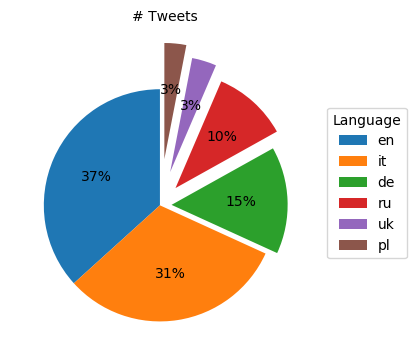

In [10]:
labels = ["en", "it", "de", "ru", "uk", "pl"]
sizes = [size(df_5)[1], size(df_2)[1], size(df_1)[1],   size(df_4)[1], size(df_3)[1], size(df_6)[1]]
explode = (0, 0.0, 0.1, 0.2, 0.3, 0.4) 
sizes = sizes ./ sum(sizes)

fig, ax = plt.subplots(1,1, figsize=(4, 4))

fig.subplots_adjust(hspace=0.03, wspace=0.03)

ax.pie(sizes, explode=explode, startangle=90, autopct="%1.f%%")
ax.set_title("# Tweets")
ax.axis("equal");

ax.legend(labels, title="Language", loc="center left", bbox_to_anchor=(1, 0, 0.6, 1));

# Minute-resolution scale

Let us analyze density of tweets using a minute-resolution scale. To do so, we need to convert the date/time of the creation of each tweet into a minute since the beginning of the year. We then subtract minute of "now" to have a zero reference point [when the tweets were downloaded]. 

In [11]:
time_1 = conv_to_minumte.(DateTime.(df_1[:,3]))
time_2 = conv_to_minumte.(DateTime.(df_2[:,3]))
time_3 = conv_to_minumte.(DateTime.(df_3[:,3]))
time_4 = conv_to_minumte.(DateTime.(df_4[:,3]))
time_5 = conv_to_minumte.(DateTime.(df_5[:,3]))
time_6 = conv_to_minumte.(DateTime.(df_6[:,3]))

# since_i = minimum(minimum.([time_1, time_2, time_3, time_4, time_5, time_6]))
since_i = conv_to_minumte(DateTime("2020-04-19T09:20:56.239"))

time_1 = time_1 .- since_i
time_2 = time_2 .- since_i
time_3 = time_3 .- since_i
time_4 = time_4 .- since_i
time_5 = time_5 .- since_i
time_6 = time_6 .- since_i

# bins = 0:40:maximum(maximum.([time_1, time_2, time_3, time_4, time_5, time_6]))+40
# bins = 0:-40:minimum(minimum.([time_1, time_2, time_3, time_4, time_5, time_6]))-40
bins = minimum(minimum.([time_1, time_2, time_3, time_4, time_5, time_6]))-40:40:0

-11904.0:40.0:-24.0

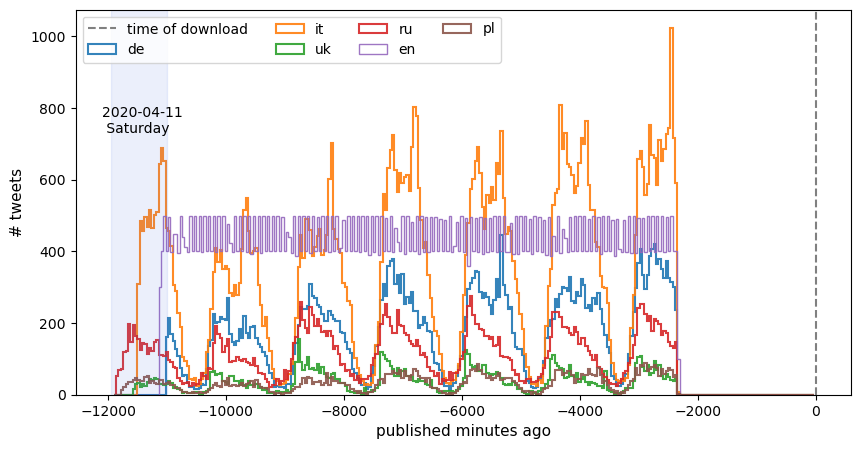

PyObject Text(24.999999999999986, 0.5, '# tweets')

In [12]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))

ax.hist(time_1, bins=bins, histtype="step", density=false, color="C0", lw=1.5, alpha=0.9, label="de")
ax.hist(time_2, bins=bins, histtype="step", density=false, color="C1", lw=1.5, alpha=0.9, label="it")
ax.hist(time_3, bins=bins, histtype="step", density=false, color="C2", lw=1.5, alpha=0.9, label="uk")
ax.hist(time_4, bins=bins, histtype="step", density=false, color="C3", lw=1.5, alpha=0.9, label="ru")
ax.hist(time_5, bins=bins, histtype="step", density=false, color="C4", lw=1, alpha=0.9, label="en")
ax.hist(time_6, bins=bins, histtype="step", density=false, color="C5", lw=1.5, alpha=0.9, label="pl")

ax.axvline(0, color="gray", ls="--", label="time of download")
ax.axvspan(-11950, -11000, alpha=0.1, color="royalblue")

ax.text(-12100, 730, "2020-04-11 \n Saturday",)

ax.legend(loc="upper left", frameon=true, framealpha=0.8, ncol=4)

ax.set_xlabel("published minutes ago")
ax.set_ylabel("# tweets")

## favorite_count:

 Let us analyze how many tweets were "favorited" by users in these minutes: 

In [13]:
bins = minimum(minimum.([time_1, time_2, time_3, time_4, time_5, time_6]))-60:40:0

-11924.0:40.0:-4.0

In [14]:
mask_1 = df_1[:,2] .> 0
x_1 = time_1[mask_1]
y_1 = df_1[:,2][mask_1]
(f1, info_1) = linreg(x_1, y_1, bias_c=false)

mask_2 = df_2[:,2] .> 0
x_2 = time_2[mask_2]
y_2 = df_2[:,2][mask_2]
(f2, info_2) = linreg(x_2, y_2, bias_c=false)

mask_3 = df_3[:,2] .> 0
x_3 = time_3[mask_3]
y_3 = df_3[:,2][mask_3]
(f3, info_3) = linreg(x_3, y_3, bias_c=false)

mask_4 = df_4[:,2] .> 0
x_4 = time_4[mask_4]
y_4 = df_4[:,2][mask_4]
(f4, info_4) = linreg(x_4, y_4, bias_c=false)

mask_5 = df_5[:,2] .> 0
x_5 = time_5[mask_5]
y_5 = df_5[:,2][mask_5]
(f5, info_5) = linreg(x_5, y_5, bias_c=false)

mask_6 = df_6[:,2] .> 0
x_6 = time_6[mask_6]
y_6 = df_6[:,2][mask_6]
(f6, info_6) = linreg(x_6, y_6, bias_c=false)

(var"#g2#5"{Float64}(-0.0005720181265816261), (-0.0005720181265816261, 9.401895339316255))

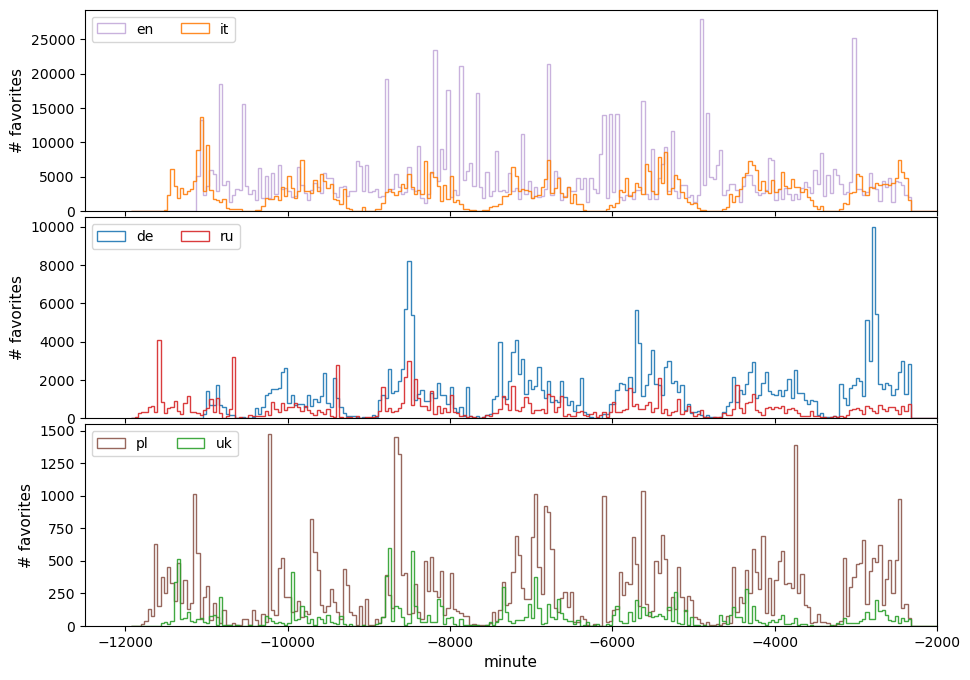

0-element Array{Any,1}

In [15]:
fig, ax = plt.subplots(3,1, figsize=(11, 8))

fig.subplots_adjust(hspace=0.03, wspace=0.04)

ax[1].hist(time_5, bins=bins, weights =  df_5[:,2], histtype="step", density=false, color="C4", lw=1, alpha=0.5, label="en")
ax[1].hist(time_2, bins=bins, weights =  df_2[:,2], histtype="step", density=false, color="C1", lw=1, alpha=0.9, label="it")
ax[2].hist(time_1, bins=bins, weights =  df_1[:,2], histtype="step", density=false, color="C0", lw=1, alpha=0.9, label="de")
ax[2].hist(time_4, bins=bins, weights =  df_4[:,2], histtype="step", density=false, color="C3", lw=1, alpha=0.9, label="ru")
ax[3].hist(time_6, bins=bins, weights =  df_6[:,2], histtype="step", density=false, color="C5", lw=1, alpha=0.9, label="pl")
ax[3].hist(time_3, bins=bins, weights =  df_3[:,2], histtype="step", density=false, color="C2", lw=1, alpha=0.9, label="uk")

ax[1].legend(loc="upper left", frameon=true, framealpha=0.8, ncol=3)
ax[2].legend(loc="upper left", frameon=true, framealpha=0.8, ncol=3)
ax[3].legend(loc="upper left", frameon=true, framealpha=0.8, ncol=3)

ax[3].set_xlabel("minute")
ax[1].set_ylabel("# favorites")
ax[2].set_ylabel("# favorites")
ax[3].set_ylabel("# favorites")

# ax[1].set_ylim(0, 0.0008)
ax[1].set_xlim(-12500, -2000)
ax[2].set_xlim(-12500, -2000)
ax[3].set_xlim(-12500, -2000)

ax[1].get_shared_x_axes().join(ax[1], ax[1])
ax[1].set_xticklabels([])
ax[2].get_shared_x_axes().join(ax[2], ax[3])
ax[2].set_xticklabels([])

tweets that were posted earlier have more likes:

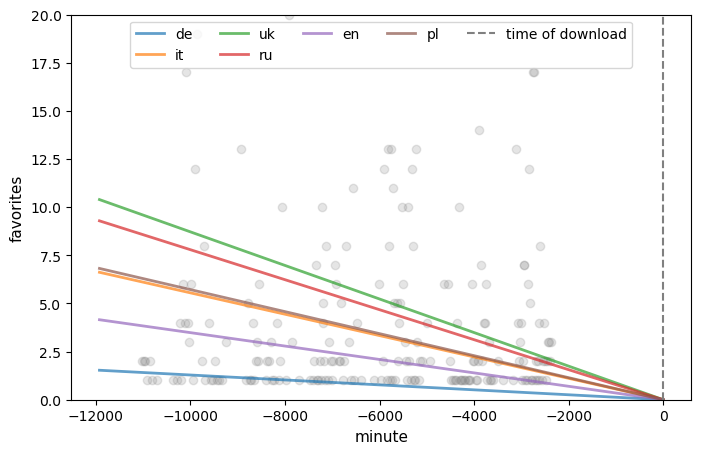

PyObject <matplotlib.legend.Legend object at 0x7fb8bec78b50>

In [16]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))

X = collect(bins)

ax.scatter(x_1[1:100:end], y_1[1:100:end], color="gray", alpha=0.2)
ax.plot(X, f1.(X), color="C0", alpha=0.7, lw=2, label="de")
ax.plot(X, f2.(X), color="C1", alpha=0.7, lw=2, label="it")
ax.plot(X, f3.(X), color="C2", alpha=0.7, lw=2, label="uk")
ax.plot(X, f4.(X), color="C3", alpha=0.7, lw=2, label="ru")
ax.plot(X, f5.(X), color="C4", alpha=0.7, lw=2, label="en")
ax.plot(X, f6.(X), color="C5", alpha=0.7, lw=2, label="pl")

ax.axvline(0, color="gray", ls="--", label="time of download")
# ax.axvspan(-11950, -11000, alpha=0.1, color="royalblue")

# ax.text(-12100, 150, "2020-04-11 \n Saturday",)

ax.set_ylim(0, 20)

ax.set_ylabel("favorites")
ax.set_xlabel("minute")

ax.legend(loc="upper center", frameon=true, framealpha=0.8, ncol=5)

## retweet_count:

In [17]:
mask_1 = df_1[:,1] .> 0
x_1 = time_1[mask_1]
y_1 = df_1[:,1][mask_1]
(f1, info_1) = linreg(x_1, y_1, bias_c=false)

mask_2 = df_2[:,1] .> 0
x_2 = time_2[mask_2]
y_2 = df_2[:,1][mask_2]
(f2, info_2) = linreg(x_2, y_2, bias_c=false)

mask_3 = df_3[:,1] .> 0
x_3 = time_3[mask_3]
y_3 = df_3[:,1][mask_3]
(f3, info_3) = linreg(x_3, y_3, bias_c=false)

mask_4 = df_4[:,1] .> 0
x_4 = time_4[mask_4]
y_4 = df_4[:,1][mask_4]
(f4, info_4) = linreg(x_4, y_4, bias_c=false)

mask_5 = df_5[:,1] .> 0
x_5 = time_5[mask_5]
y_5 = df_5[:,1][mask_5]
(f5, info_5) = linreg(x_5, y_5, bias_c=false)

mask_6 = df_6[:,1] .> 0
x_6 = time_6[mask_6]
y_6 = df_6[:,1][mask_6]
(f6, info_6) = linreg(x_6, y_6, bias_c=false)

(var"#g2#5"{Float64}(-0.00021715964573060947), (-0.00021715964573060947, 4.558836753758436))

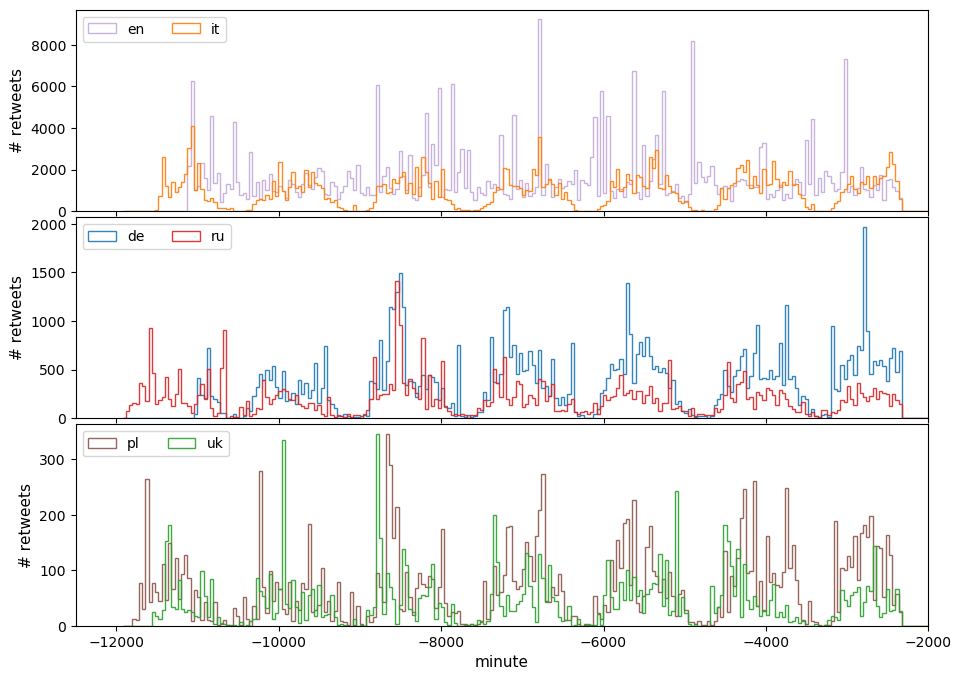

0-element Array{Any,1}

In [18]:
fig, ax = plt.subplots(3,1, figsize=(11, 8))

fig.subplots_adjust(hspace=0.03, wspace=0.04)

ax[1].hist(time_5, bins=bins, weights =  df_5[:,1], histtype="step", density=false, color="C4", lw=1, alpha=0.5, label="en")
ax[1].hist(time_2, bins=bins, weights =  df_2[:,1], histtype="step", density=false, color="C1", lw=1, alpha=0.9, label="it")
ax[2].hist(time_1, bins=bins, weights =  df_1[:,1], histtype="step", density=false, color="C0", lw=1, alpha=0.9, label="de")
ax[2].hist(time_4, bins=bins, weights =  df_4[:,1], histtype="step", density=false, color="C3", lw=1, alpha=0.9, label="ru")
ax[3].hist(time_6, bins=bins, weights =  df_6[:,1], histtype="step", density=false, color="C5", lw=1, alpha=0.9, label="pl")
ax[3].hist(time_3, bins=bins, weights =  df_3[:,1], histtype="step", density=false, color="C2", lw=1, alpha=0.9, label="uk")

ax[1].legend(loc="upper left", frameon=true, framealpha=0.8, ncol=3)
ax[2].legend(loc="upper left", frameon=true, framealpha=0.8, ncol=3)
ax[3].legend(loc="upper left", frameon=true, framealpha=0.8, ncol=3)

ax[3].set_xlabel("minute")
ax[1].set_ylabel("# retweets")
ax[2].set_ylabel("# retweets")
ax[3].set_ylabel("# retweets")

# ax[1].set_ylim(0, 0.0008)
ax[1].set_xlim(-12500, -2000)
ax[2].set_xlim(-12500, -2000)
ax[3].set_xlim(-12500, -2000)

ax[1].get_shared_x_axes().join(ax[1], ax[1])
ax[1].set_xticklabels([])
ax[2].get_shared_x_axes().join(ax[2], ax[3])
ax[2].set_xticklabels([])

On average tweets that were posted earlier have more retweets

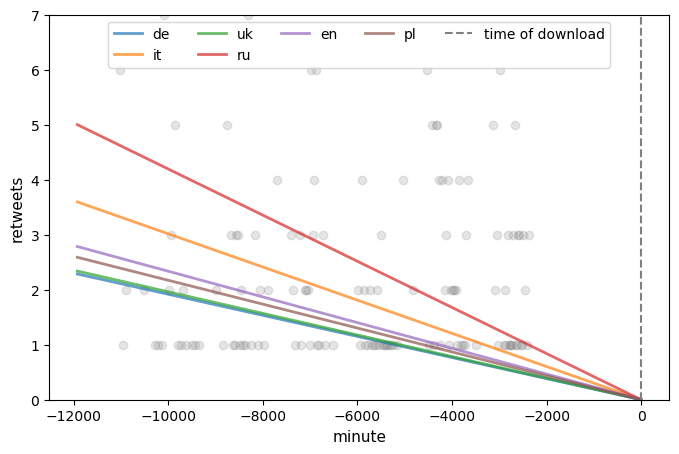

PyObject <matplotlib.legend.Legend object at 0x7fb8c168bcd0>

In [19]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))

X = collect(bins)

ax.scatter(x_1[1:80:end], y_1[1:80:end], color="gray", alpha=0.2)
ax.plot(X, f1.(X), color="C0", alpha=0.7, lw=2, label="de")
ax.plot(X, f2.(X), color="C1", alpha=0.7, lw=2, label="it")
ax.plot(X, f3.(X), color="C2", alpha=0.7, lw=2, label="uk")
ax.plot(X, f4.(X), color="C3", alpha=0.7, lw=2, label="ru")
ax.plot(X, f5.(X), color="C4", alpha=0.7, lw=2, label="en")
ax.plot(X, f6.(X), color="C5", alpha=0.7, lw=2, label="pl")

ax.axvline(0, color="gray", ls="--", label="time of download")
# ax.axvspan(-11950, -11000, alpha=0.1, color="royalblue")

# ax.text(-12100, 150, "2020-04-11 \n Saturday",)

ax.set_ylim(0, 7)

ax.set_ylabel("retweets")
ax.set_xlabel("minute")

ax.legend(loc="upper center", frameon=true, framealpha=0.8, ncol=5)

# Average Over Interval: 

In [20]:
hist_tweets = fit(Histogram, time_2, bins)
hist_retweets = fit(Histogram, time_2, weights(convert(Array{Int64}, df_2[:,1])), bins)
hist_fav = fit(Histogram, time_2, weights(convert(Array{Int64}, df_2[:,2])), bins);

mask_2 = df_2[:,1] .> -1
x_2 = time_2[mask_2]
y_2_rt = df_2[:,1][mask_2]
(f2_rt, info_2) = linreg(x_2, y_2_rt, bias_c=true)

y_2_fw = df_2[:,2][mask_2]
(f2_fw, info_2) = linreg(x_2, y_2_fw, bias_c=true)

(var"#g1#4"{Float64,Float64}(-0.0002594755421852418, 5.310389113797905), (-0.0002594755421852418, 5.310389113797905))

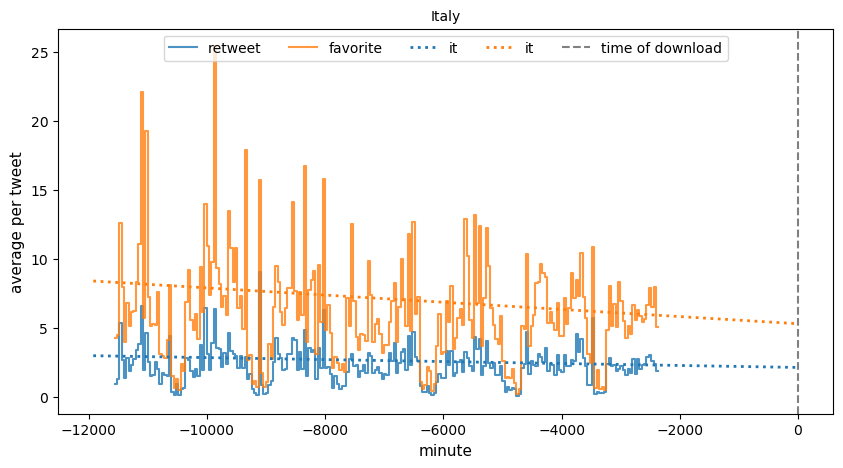

PyObject Text(0.5, 25.0, 'minute')

In [21]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))

ax.step(bins[1:end-1], hist_retweets.weights ./ hist_tweets.weights, color="C0", alpha=0.8, label="retweet")
ax.step(bins[1:end-1], hist_fav.weights ./ hist_tweets.weights, color="C1", alpha=0.8, label="favorite")

ax.plot(X, f2_rt.(X), color="C0", alpha=1, lw=2, ls=":", label="it", )
ax.plot(X, f2_fw.(X), color="C1", alpha=1, lw=2, ls=":", label="it", )

ax.axvline(0, color="gray", ls="--", label="time of download")
ax.legend(loc="upper center", frameon=true, framealpha=0.8, ncol=5)
ax.set_title("Italy")

ax.set_ylabel("average per tweet")
ax.set_xlabel("minute")

## Frequency analysis: 

Allows seeing what is the overall frequency of the COVID tweets. A log scale is used. 

In [22]:
frequency_1 = diff(sort(parse.(Int, df_1[:,5])))
frequency_2 = diff(sort(parse.(Int, df_2[:,5])))
frequency_3 = diff(sort(parse.(Int, df_3[:,5])))
frequency_4 = diff(sort(parse.(Int, df_4[:,5])))
frequency_5 = diff(sort(parse.(Int, df_5[:,5])))
frequency_6 = diff(sort(parse.(Int, df_6[:,5])))


bins = range(minimum(frequency_1), stop=maximum(frequency_1), length=200)

1.0:1.5191452893261307e10:3.02309912576e12

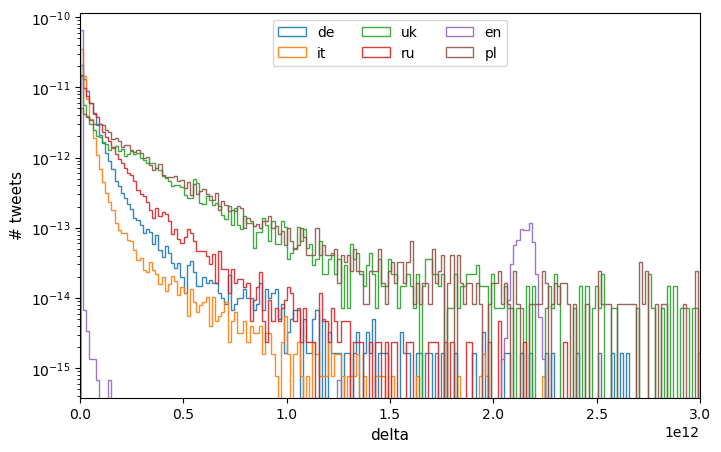

In [23]:

fig, ax = plt.subplots(1,1, figsize=(8, 5))

ax.hist(frequency_1, bins=bins, histtype="step", density=true, color="C0", lw=1, alpha=0.9, label="de")
ax.hist(frequency_2, bins=bins, histtype="step", density=true, color="C1", lw=1, alpha=0.9, label="it")
ax.hist(frequency_3, bins=bins, histtype="step", density=true, color="C2", lw=1, alpha=0.9, label="uk")
ax.hist(frequency_4, bins=bins, histtype="step", density=true, color="C3", lw=1, alpha=0.9, label="ru")
ax.hist(frequency_5, bins=bins, histtype="step", density=true, color="C4", lw=1, alpha=0.9, label="en")
ax.hist(frequency_6, bins=bins, histtype="step", density=true, color="C5", lw=1, alpha=0.9, label="pl")

ax.legend(loc="upper center", frameon=true, framealpha=0.8, ncol=3)

# ax.set_xlim(0, 0.3*10^13)
ax.set_xlim(0, 3*10^12)

ax.set_xlabel("delta")
ax.set_ylabel("# tweets")

ax.set_yscale("log")

# plt.hist(frequency_1, bins=bins)

# Periodic hour-resolution scale

Let us see how the activity of users is distributed during the day 

In [24]:
x_1 = hour.(DateTime.(df_1[:,3]))
y_1 = df_1[:,2]
(f1, info_1) = linreg(x_1, y_1, bias_c=false)

x_2 = hour.(DateTime.(df_2[:,3]))
y_2 = df_2[:,2]
(f2, info_2) = linreg(x_2, y_2, bias_c=false)

x_3 = hour.(DateTime.(df_3[:,3]))
y_3 = df_3[:,2]
(f3, info_3) = linreg(x_3, y_3, bias_c=false)

x_4 = hour.(DateTime.(df_4[:,3]))
y_4 = df_4[:,2]
(f4, info_4) = linreg(x_4, y_4, bias_c=false)

x_5 = hour.(DateTime.(df_5[:,3]))
y_5 = df_5[:,2]
(f5, info_5) = linreg(x_5, y_5, bias_c=false)

x_6 = hour.(DateTime.(df_6[:,3]))
y_6 = df_6[:,2]
(f6, info_6) = linreg(x_6, y_6, bias_c=false)

(var"#g2#5"{Float64}(-0.03667169040587577), (-0.03667169040587577, 7.8195667599469845))

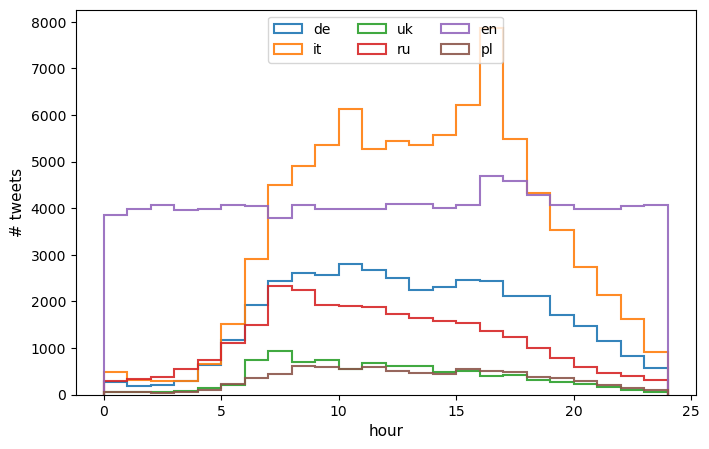

PyObject Text(25.0, 0.5, '# tweets')

In [25]:
bins=0:1:24

fig, ax = plt.subplots(1,1, figsize=(8, 5))

ax.hist(x_1, bins=bins, histtype="step", density=false, color="C0", lw=1.5, alpha=0.9, label="de")
ax.hist(x_2, bins=bins, histtype="step", density=false, color="C1", lw=1.5, alpha=0.9, label="it")
ax.hist(x_3, bins=bins, histtype="step", density=false, color="C2", lw=1.5, alpha=0.9, label="uk")
ax.hist(x_4, bins=bins, histtype="step", density=false, color="C3", lw=1.5, alpha=0.9, label="ru")
ax.hist(x_5, bins=bins, histtype="step", density=false, color="C4", lw=1.5, alpha=0.9, label="en")
ax.hist(x_6, bins=bins, histtype="step", density=false, color="C5", lw=1.5, alpha=0.9, label="pl")


ax.legend(loc="upper center", frameon=true, framealpha=0.8, ncol=3)

ax.set_xlabel("hour")
ax.set_ylabel("# tweets")

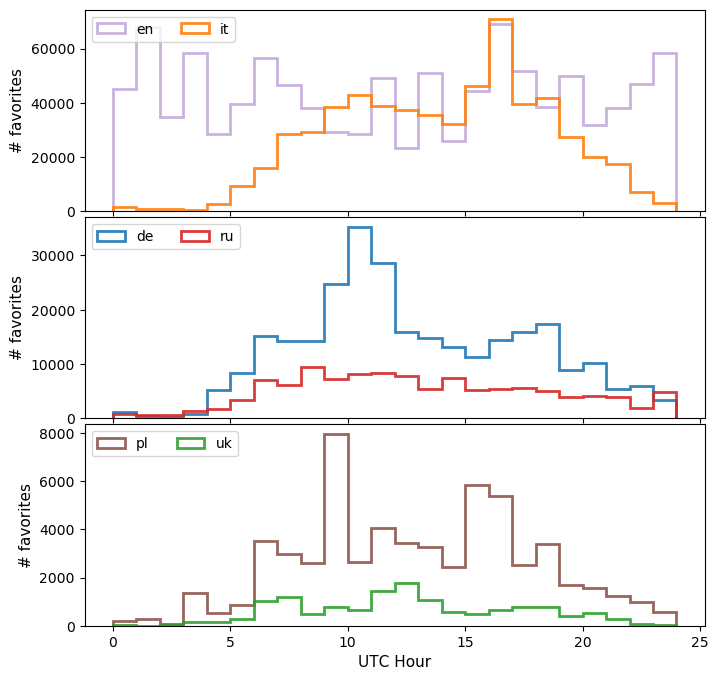

0-element Array{Any,1}

In [26]:
fig, ax = plt.subplots(3,1, figsize=(8, 8))

fig.subplots_adjust(hspace=0.03, wspace=0.04)

ax[1].hist(x_5, bins=bins, weights =  df_5[:,2], histtype="step", density=false, color="C4", lw=2, alpha=0.5, label="en")
ax[1].hist(x_2, bins=bins, weights =  df_2[:,2], histtype="step", density=false, color="C1", lw=2, alpha=0.9, label="it")
ax[2].hist(x_1, bins=bins, weights =  df_1[:,2], histtype="step", density=false, color="C0", lw=2, alpha=0.9, label="de")
ax[2].hist(x_4, bins=bins, weights =  df_4[:,2], histtype="step", density=false, color="C3", lw=2, alpha=0.9, label="ru")
ax[3].hist(x_6, bins=bins, weights =  df_6[:,2], histtype="step", density=false, color="C5", lw=2, alpha=0.9, label="pl")
ax[3].hist(x_3, bins=bins, weights =  df_3[:,2], histtype="step", density=false, color="C2", lw=2, alpha=0.9, label="uk")

ax[1].legend(loc="upper left", frameon=true, framealpha=0.8, ncol=3)
ax[2].legend(loc="upper left", frameon=true, framealpha=0.8, ncol=3)
ax[3].legend(loc="upper left", frameon=true, framealpha=0.8, ncol=3)

ax[3].set_xlabel("UTC Hour")
ax[1].set_ylabel("# favorites")
ax[2].set_ylabel("# favorites")
ax[3].set_ylabel("# favorites")

ax[1].get_shared_x_axes().join(ax[1], ax[1])
ax[1].set_xticklabels([])
ax[2].get_shared_x_axes().join(ax[2], ax[3])
ax[2].set_xticklabels([])

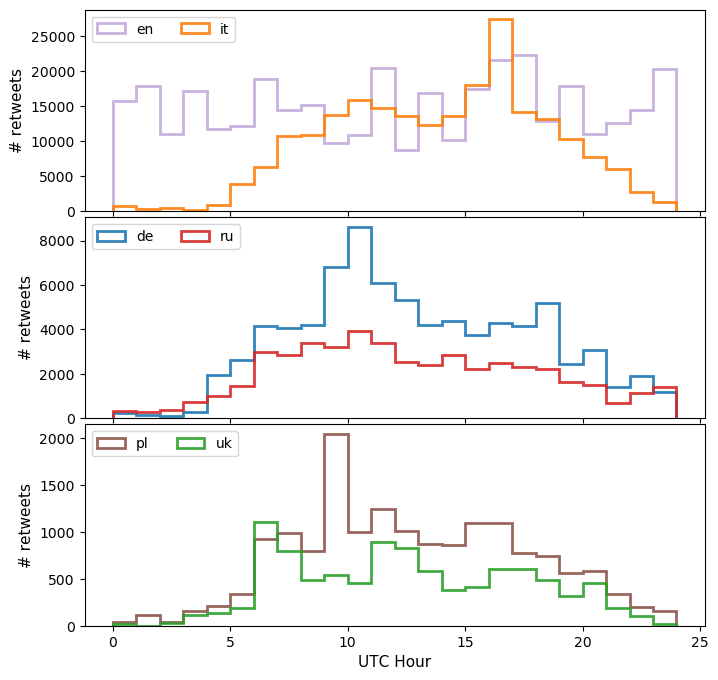

0-element Array{Any,1}

In [27]:
fig, ax = plt.subplots(3,1, figsize=(8, 8))

fig.subplots_adjust(hspace=0.03, wspace=0.04)

ax[1].hist(x_5, bins=bins, weights =  df_5[:,1], histtype="step", density=false, color="C4", lw=2, alpha=0.5, label="en")
ax[1].hist(x_2, bins=bins, weights =  df_2[:,1], histtype="step", density=false, color="C1", lw=2, alpha=0.9, label="it")
ax[2].hist(x_1, bins=bins, weights =  df_1[:,1], histtype="step", density=false, color="C0", lw=2, alpha=0.9, label="de")
ax[2].hist(x_4, bins=bins, weights =  df_4[:,1], histtype="step", density=false, color="C3", lw=2, alpha=0.9, label="ru")
ax[3].hist(x_6, bins=bins, weights =  df_6[:,1], histtype="step", density=false, color="C5", lw=2, alpha=0.9, label="pl")
ax[3].hist(x_3, bins=bins, weights =  df_3[:,1], histtype="step", density=false, color="C2", lw=2, alpha=0.9, label="uk")

ax[1].legend(loc="upper left", frameon=true, framealpha=0.8, ncol=3)
ax[2].legend(loc="upper left", frameon=true, framealpha=0.8, ncol=3)
ax[3].legend(loc="upper left", frameon=true, framealpha=0.8, ncol=3)

ax[3].set_xlabel("UTC Hour")
ax[1].set_ylabel("# retweets")
ax[2].set_ylabel("# retweets")
ax[3].set_ylabel("# retweets")

ax[1].get_shared_x_axes().join(ax[1], ax[1])
ax[1].set_xticklabels([])
ax[2].get_shared_x_axes().join(ax[2], ax[3])
ax[2].set_xticklabels([])

# Average over interval: 

In [28]:
bins=0:1:24
X = collect(bins)

retweets_d =  df_2[:,1]
favourite_d = df_2[:,2]
date_time = DateTime.(df_2[:,3])

country = "Italy"

hist_tweets = fit(Histogram, hour.(date_time), bins)
hist_retweets = fit(Histogram, hour.(date_time), weights(convert(Array{Int64}, retweets_d)), bins)
hist_fav = fit(Histogram, hour.(date_time), weights(convert(Array{Int64}, favourite_d)), bins);

mask_2 = retweets_d .> -1
x_2 = hour.(date_time)[mask_2]
y_2_rt = retweets_d[mask_2]
(f2_rt, info_2) = linreg(x_2, y_2_rt, bias_c=true)

y_2_fw = favourite_d[mask_2]
(f2_fw, info_2) = linreg(x_2, y_2_fw, bias_c=true)

(var"#g1#4"{Float64,Float64}(0.1316234709527804, 5.278687787463953), (0.1316234709527804, 5.278687787463953))

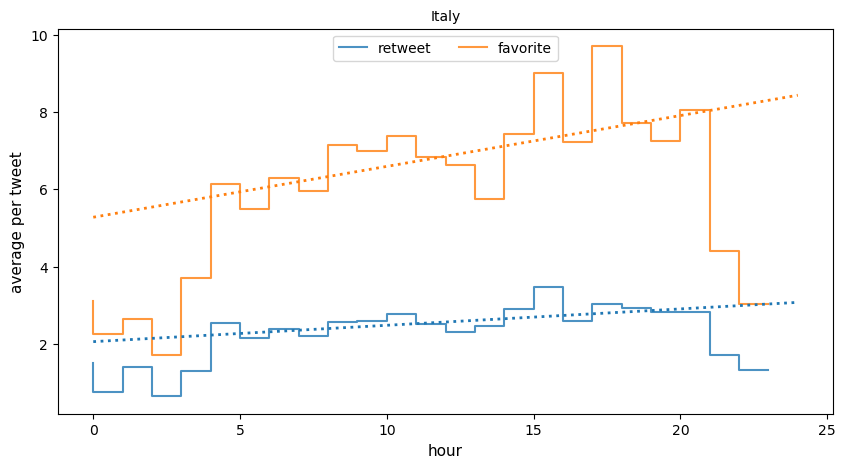

PyObject Text(0.5, 25.0, 'hour')

In [29]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))

ax.step(bins[1:end-1], hist_retweets.weights ./ hist_tweets.weights, color="C0", alpha=0.8, label="retweet")
ax.step(bins[1:end-1], hist_fav.weights ./ hist_tweets.weights, color="C1", alpha=0.8, label="favorite")

ax.plot(X, f2_rt.(X), color="C0", alpha=1, lw=2, ls=":",  )
ax.plot(X, f2_fw.(X), color="C1", alpha=1, lw=2, ls=":", )

# ax.axvline(0, color="gray", ls="--", label="time of download")
ax.legend(loc="upper center", frameon=true, framealpha=0.8, ncol=5)
ax.set_title(country)

ax.set_ylabel("average per tweet")
ax.set_xlabel("hour")

# Retweets vs. Favorite activity

Let us see which audience is more active. Let us start with tweets without fav=0 and ret=0 

In [30]:
mask_1 = (df_1[:,1] .> 0) .*  (df_1[:,2] .> 0)
x_1 = df_1[:,2][mask_1]
y_1 = df_1[:,1][mask_1]
(f1, info_1) = linreg(x_1, y_1, bias_c=false)

mask_2 = (df_2[:,1] .> 0) .*  (df_2[:,2] .> 0)
x_2 = df_2[:,2][mask_2]
y_2 = df_2[:,1][mask_2]
(f2, info_2) = linreg(x_2, y_2, bias_c=false)

mask_3 = (df_3[:,1] .> 0) .*  (df_3[:,2] .> 0)
x_3 = df_3[:,2][mask_3]
y_3 = df_3[:,1][mask_3]
(f3, info_3) = linreg(x_3, y_3, bias_c=false)

mask_4 = (df_4[:,1] .> 0) .*  (df_4[:,2] .> 0)
x_4 = df_4[:,2][mask_4]
y_4 = df_4[:,1][mask_4]
(f4, info_4) = linreg(x_4, y_4, bias_c=false)

mask_5 = (df_5[:,1] .> 0) .*  (df_5[:,2] .> 0)
x_5 = df_5[:,2][mask_5]
y_5 = df_5[:,1][mask_5]
(f5, info_5) = linreg(x_5, y_5, bias_c=false)

mask_6 = (df_6[:,1] .> 0) .*  (df_6[:,2] .> 0)
x_6 = df_6[:,2][mask_6]
y_6 = df_6[:,1][mask_6]
(f6, info_6) = linreg(x_6, y_6, bias_c=false)

(var"#g2#5"{Float64}(0.16434398531718947), (0.16434398531718947, 2.807234797095527))

In [31]:
bins = collect(0:1:maximum(df_5[:,2]));

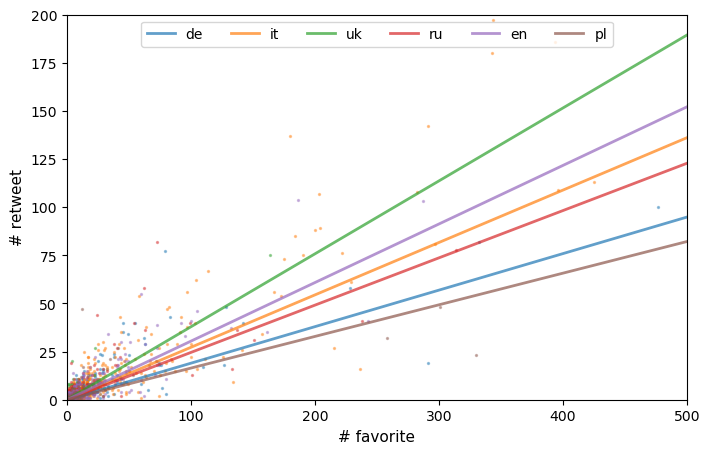

PyObject <matplotlib.legend.Legend object at 0x7fb8c0b00a50>

In [32]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))

ax.scatter(x_1[1:30:end], y_1[1:30:end], color="C0", s=2, alpha=0.4)
ax.scatter(x_2[1:30:end], y_2[1:30:end], color="C1", s=2, alpha=0.4)
ax.scatter(x_3[1:30:end], y_3[1:30:end], color="C2", s=2, alpha=0.4)
ax.scatter(x_4[1:30:end], y_4[1:30:end], color="C3", s=2, alpha=0.4)
ax.scatter(x_5[1:80:end], y_5[1:80:end], color="C4", s=2, alpha=0.4)
ax.scatter(x_6[1:30:end], y_6[1:30:end], color="C5", s=2, alpha=0.4)

ax.plot(bins, f1.(bins), color="C0", alpha=0.7, lw=2, label="de")
ax.plot(bins, f2.(bins), color="C1", alpha=0.7, lw=2, label="it")
ax.plot(bins, f3.(bins), color="C2", alpha=0.7, lw=2, label="uk")
ax.plot(bins, f4.(bins), color="C3", alpha=0.7, lw=2, label="ru")
ax.plot(bins, f5.(bins), color="C4", alpha=0.7, lw=2, label="en")
ax.plot(bins, f6.(bins), color="C5", alpha=0.7, lw=2, label="pl")


ax.set_xlim(0, 500)
ax.set_ylim(0, 200)

ax.set_ylabel("# retweet")
ax.set_xlabel("# favorite")

ax.legend(loc="upper center", frameon=true, framealpha=0.8, ncol=6)